# ``atmosphere.py`` tutorial

This tutorial needs your help to make it better!

This tutorial has been tested against the following package versions:
* pvlib 0.2.0
* Python 2.7.10
* IPython 3.2
* Pandas 0.16.2

It should work with other Python and Pandas versions. It requires pvlib > 0.2.0 and IPython > 3.0.

Authors:
* Will Holmgren (@wholmgren), University of Arizona. 2015.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(rc={"figure.figsize": (12, 6)})
except ImportError:
    print('We suggest you install seaborn using conda or pip and rerun this cell')

# built in python modules
import datetime
import logging
import os
import inspect

# python add-ons
import numpy as np
import pandas as pd

In [2]:
import pvlib
from pvlib.location import Location

In [3]:
tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')

In [4]:
print(tus)

Tucson: latitude=32.2, longitude=-111, tz=US/Arizona, altitude=700


                           apparent_elevation  apparent_azimuth  elevation  \
2014-06-24 00:00:00-07:00          -34.039132        352.695587 -34.039132   
2014-06-24 00:01:00-07:00          -34.065534        352.970625 -34.065534   
2014-06-24 00:02:00-07:00          -34.090926        353.245855 -34.090926   
2014-06-24 00:03:00-07:00          -34.115309        353.521302 -34.115309   
2014-06-24 00:04:00-07:00          -34.138686        353.796969 -34.138686   

                              azimuth  apparent_zenith      zenith  
2014-06-24 00:00:00-07:00  352.695587       124.039132  124.039132  
2014-06-24 00:01:00-07:00  352.970625       124.065534  124.065534  
2014-06-24 00:02:00-07:00  353.245855       124.090926  124.090926  
2014-06-24 00:03:00-07:00  353.521302       124.115309  124.115309  
2014-06-24 00:04:00-07:00  353.796969       124.138686  124.138686  
                           apparent_elevation  apparent_azimuth  elevation  \
2014-06-24 00:00:00-07:00          -34.

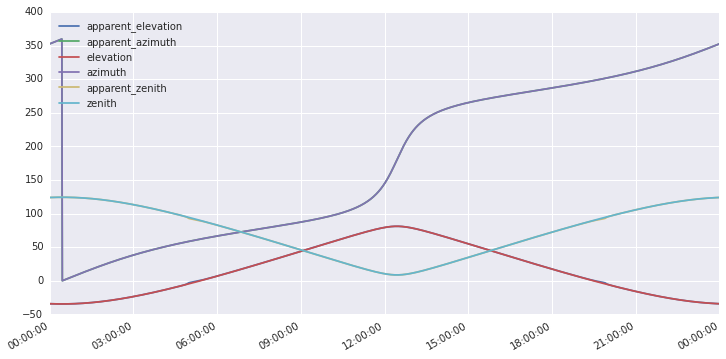

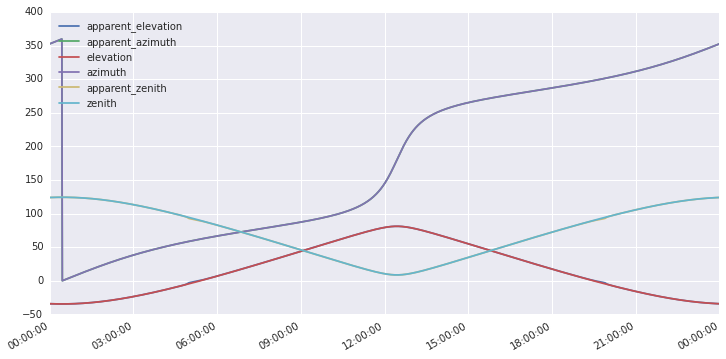

In [5]:
times = pd.date_range(start=datetime.datetime(2014,6,24), end=datetime.datetime(2014,6,25), freq='1Min')

pyephem_ephem = pvlib.solarposition.get_solarposition(times, tus, method='pyephem')
print(pyephem_ephem.head())
pyephem_ephem.plot()

pyephem_ephem = pvlib.solarposition.get_solarposition(times.tz_localize(tus.tz), tus, method='pyephem')
print(pyephem_ephem.head())
pyephem_ephem.plot()

(0, 100)

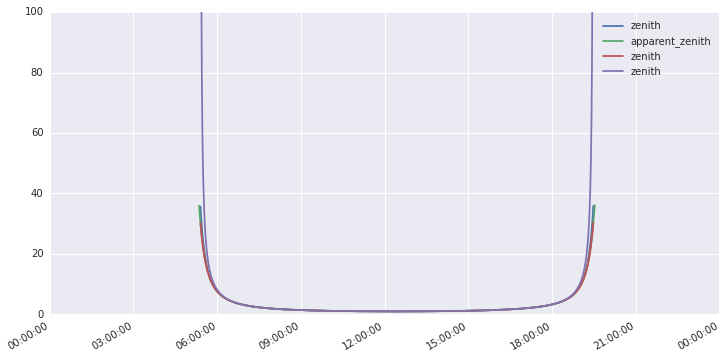

In [6]:
pvlib.atmosphere.relativeairmass(pyephem_ephem['zenith']).plot()
pvlib.atmosphere.relativeairmass(pyephem_ephem['apparent_zenith']).plot()
pvlib.atmosphere.relativeairmass(pyephem_ephem['zenith'], model='young1994').plot()
pvlib.atmosphere.relativeairmass(pyephem_ephem['zenith'], model='simple').plot()
plt.legend()
plt.ylim(0,100)

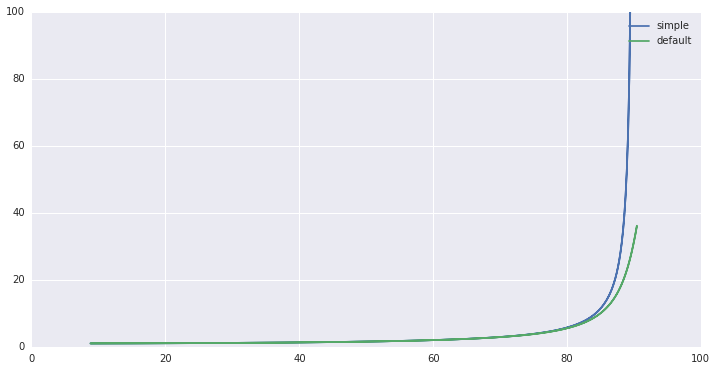

In [7]:
plt.plot(pyephem_ephem['zenith'], pvlib.atmosphere.relativeairmass(pyephem_ephem['zenith'], model='simple'), label='simple')
plt.plot(pyephem_ephem['zenith'], pvlib.atmosphere.relativeairmass(pyephem_ephem['apparent_zenith']), label='default')
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend()